*Classification Metrics*

In [ ]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer

In [ ]:
X, y = load_breast_cancer(return_X_y=True)

***Accuracy***
  * no.of correct predisctions/all predictions

In [ ]:
fold = ShuffleSplit()
scoring = "accuracy"
print (cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=fold, scoring=scoring))

[0.98245614 0.92982456 0.94736842 0.96491228 0.98245614 0.92982456
 0.94736842 0.89473684 0.94736842 0.98245614]


**Logarithmic loss**
  * prediction of probabilities of membership of class
  * scale is 0 to 1

In [ ]:
scoring = "neg_log_loss"
print (cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=fold, scoring=scoring))

[-0.06291549 -0.09761148 -0.06543244 -0.14173488 -0.12851281 -0.06272499
 -0.10825992 -0.16259661 -0.08661765 -0.01334574]


**Area under ROC curve**
  * Metric for binary classification between true positive rate(sensitivity/recall) and true negative rate(specificity)

In [ ]:
scoring = "roc_auc"
print (cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=fold, scoring=scoring))

[0.99494949 0.99338624 1.         0.98243243 0.99872123 0.99206349
 0.9961039  0.99382716 0.99459459 0.9769821 ]


In [ ]:
scoring = "precision"
print (cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=fold, scoring=scoring))
scoring = "recall"
print (cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=fold, scoring=scoring))
scoring = "f1"
print (cross_val_score(LogisticRegression(max_iter=10000), X, y, cv=fold, scoring=scoring))

**Confusion matrix**
  * rows -> Actual True, Actual False
  * columns -> Predicted True, Predicted False
  * useful for precision/recall

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
predicted = model.predict(X_test)
confusion_matrix(y_test, predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([[59,  8],
       [ 6, 98]])

**Classification Report**
  * displayes precision, recall, F1 score

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model = LogisticRegression().fit(X_train, y_train)
predicted = model.predict(X_test)
classification_report(y_test, predicted)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


'              precision    recall  f1-score   support\n\n           0       0.91      0.88      0.89        67\n           1       0.92      0.94      0.93       104\n\n    accuracy                           0.92       171\n   macro avg       0.92      0.91      0.91       171\nweighted avg       0.92      0.92      0.92       171\n'

**precision recall curve**
  better the model if plot stays high on top right

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, model.decision_function(X_test))

Text(0, 0.5, 'recall')

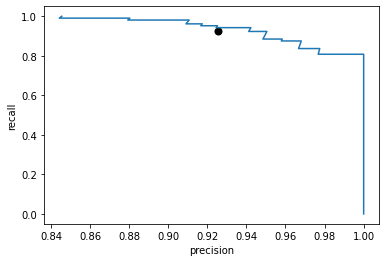

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#find thresold close to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], precision[close_zero], 'o',label='thershold zero', c='k', mew=2)
plt.plot(precision, recall, label='precision recall curve')
plt.xlabel("precision")
plt.ylabel("recall")

**roc_curve**

 better the model if plot stays high on top left

Text(0, 0.5, 'tpr(recall)')

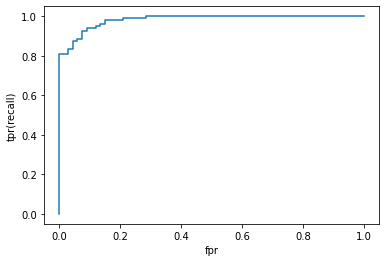

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.decision_function(X_test))
plt.plot(fpr, tpr, label='precision recall curve')
plt.xlabel("fpr")
plt.ylabel("tpr(recall)")

**f1 score**

  2* precision * recall/precision + recall

  macro -> gives equal weights to all classes irrespective of imbalancing
  weighted -> mean of per class f score, weighted by support
  micro -> total no of false positives, false negatives and true positives

In [ ]:
from sklearn.metrics import f1_score
print (f1_score(y_test, model.predict(X_test), average="micro"))
print (f1_score(y_test, model.predict(X_test), average="macro"))

0.9181286549707602
0.9136363636363636


***Visualizing***

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


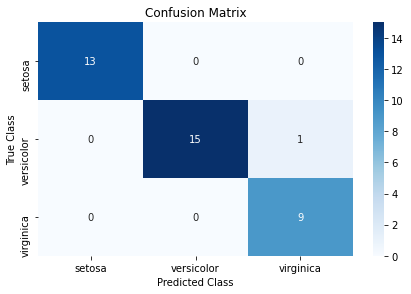

In [2]:
# Load libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
# Load data
iris = datasets.load_iris()
# Create feature matrix
features = iris.data
# Create target vector
target = iris.target
# Create list of target class names
class_names = iris.target_names
# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)
classifier = LogisticRegression()
# Train model and make predictions
target_predicted = classifier.fit(features_train,
target_train).predict(features_test)
# Create confusion matrix
matrix = confusion_matrix(target_test, target_predicted)

df = pd.DataFrame(matrix, index=class_names, columns=class_names)
sns.heatmap(df, annot=True, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()